<a href="https://colab.research.google.com/github/PilaData/Dv/blob/master/Car%20dommage%20detection%20Mask%20R-CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x
import os
!git clone https://www.github.com/matterport/Mask_RCNN.git
os.chdir('Mask_RCNN')
!python setup.py -q install
!wget --quiet https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5
!ls -lh mask_rcnn_coco.h5

TensorFlow 1.x selected.
Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 111.84 MiB | 33.12 MiB/s, done.
Resolving deltas: 100% (567/567), done.
zip_safe flag not set; analyzing archive contents...
-rw-r--r-- 1 root root 246M Nov 26  2017 mask_rcnn_coco.h5


In [2]:
!git clone https://github.com/nitsourish/car-damage-detection-using-CNN.git

Cloning into 'car-damage-detection-using-CNN'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 36 (delta 9), reused 1 (delta 0), pack-reused 0
Unpacking objects: 100% (36/36), done.


In [8]:
!python /content/Mask_RCNN/car-damage-detection-using-CNN/setup.py install

running install
running bdist_egg
running egg_info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/parallel_model.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/__init__.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/visualize.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/model.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/utils.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/config.py -> build/bdist.linux-x86_64/egg/mrcnn
byte-compiling build/bdist.linux-x86_64/egg/mrcnn/parallel_model.py to p

In [6]:
from zipfile import ZipFile 
with ZipFile('/content/Mask_RCNN/car-damage-detection-using-CNN/custom.zip', 'r') as zip: 
    zip.printdir() 
    zip.extractall() 

File Name                                             Modified             Size
custom/train/                                  2019-06-12 20:09:00            0
custom/train/image10.jpg                       2019-03-23 13:29:12       115110
custom/train/image11.jpeg                      2019-06-10 13:43:42         5375
custom/train/image12.jpg                       2019-03-23 13:12:16        70052
custom/train/image13.jpg                       2019-03-23 13:13:18        79882
custom/train/image14.jpeg                      2019-03-23 13:07:12         4794
custom/train/image16.jpg                       2019-06-10 16:49:44         5375
custom/train/image17.jpg                       2019-06-10 16:50:00         5896
custom/train/image18.jpg                       2019-06-10 16:50:42         6703
custom/train/image19.jpg                       2019-06-10 16:50:54         5832
custom/train/image2.jpg                        2019-03-23 13:31:04        46041
custom/train/image20.jpg                

In [10]:
!python /content/Mask_RCNN/car-damage-detection-using-CNN/custom_1.py train --dataset=/content/Mask_RCNN/car-damage-detection-using-CNN/custom/ --weights=coco

Using TensorFlow backend.
Weights:  coco
Dataset:  /content/Mask_RCNN/car-damage-detection-using-CNN/custom/
Logs:  /content/Mask_RCNN/logs

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbo

In [22]:
import custom
# Root directory of the project
ROOT_DIR = '/content/Mask_RCNN/'
sys.path.append(ROOT_DIR)  # To find local version of the library
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
custom_WEIGHTS_PATH = "/content/Mask_RCNN/logs/scratch20200407T0714/mask_rcnn_scratch_0015.h5"  # TODO: update this path for best performing iteration weights
config = custom.CustomConfig()
custom_DIR = os.path.join(ROOT_DIR, "car-damage-detection-using-CNN/custom/")
custom_DIR

'/content/Mask_RCNN/car-damage-detection-using-CNN/custom/'

In [24]:
import custom_1
# Load dataset
dataset = custom_1.CustomDataset()
dataset.load_custom(custom_DIR, "train")

# Must call before using the dataset
dataset.prepare()

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 49
Class Count: 2
  0. BG                                                
  1. scratch                                           


In [0]:


import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon

# Import Mask RCNN
#sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
from mrcnn import model
import mrcnn.model as modellib
from mrcnn.model import log
import cv2
import custom,custom_1
import imgaug,h5py,IPython

%matplotlib inline



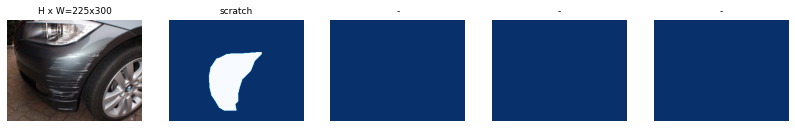

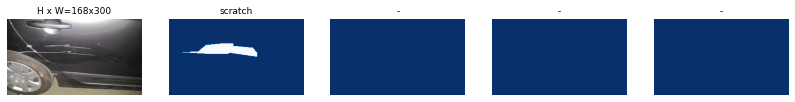

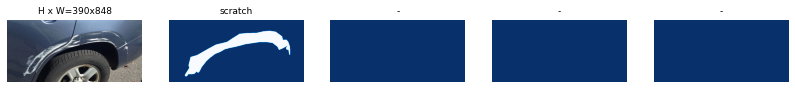

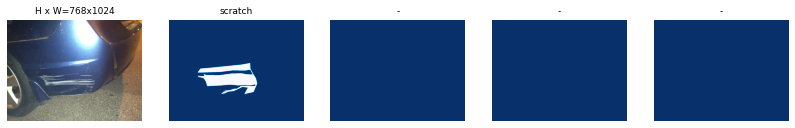

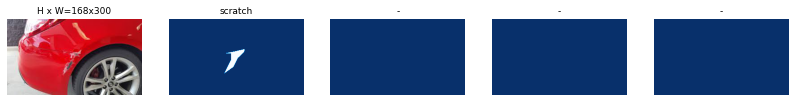

In [27]:
# Load and display random samples
image_ids = np.random.choice(dataset.image_ids, 5)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

image_id  15 /content/Mask_RCNN/car-damage-detection-using-CNN/custom/train/image18.jpg
image                    shape: (194, 259, 3)         min:    0.00000  max:  255.00000  uint8
mask                     shape: (194, 259, 1)         min:    0.00000  max:    1.00000  bool
class_ids                shape: (1,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (1, 4)                min:   55.00000  max:  234.00000  int32


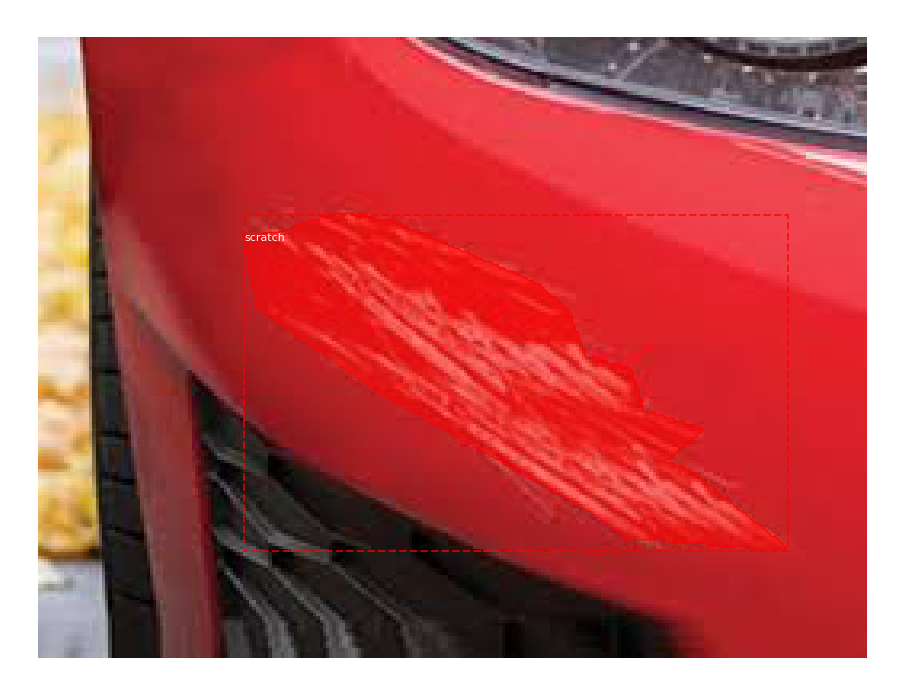

In [28]:
image_id = random.choice(dataset.image_ids)
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

In [30]:
#Annotation file load
annotations1 = json.load(open(os.path.join(ROOT_DIR, "car-damage-detection-using-CNN/custom/train/via_region_data.json"),encoding="utf8"))
annotations = list(annotations1.values()) 
annotations = [a for a in annotations if a['regions']]
annotations[0]

{'base64_img_data': '',
 'file_attributes': {},
 'filename': 'image2.jpg',
 'fileref': '',
 'regions': {'0': {'region_attributes': {'Scratch': 'scratch'},
   'shape_attributes': {'all_points_x': [428,
     429,
     480,
     518,
     557,
     577,
     610,
     660,
     642,
     578,
     579,
     585,
     590,
     574,
     580,
     516,
     507,
     474,
     427,
     426,
     412,
     412,
     430,
     470,
     452,
     428],
    'all_points_y': [232,
     216,
     198,
     193,
     212,
     238,
     237,
     242,
     248,
     248,
     260,
     292,
     343,
     409,
     417,
     441,
     443,
     427,
     413,
     381,
     324,
     301,
     288,
     249,
     231,
     232],
    'name': 'polygon'}},
  '1': {'region_attributes': {'Scratch': 'scratch'},
   'shape_attributes': {'all_points_x': [470,
     500,
     578,
     718,
     670,
     594,
     553,
     510,
     469,
     448,
     470],
    'all_points_y': [516, 548, 562, 557, 569, 

In [31]:
annotations[1]['regions']['0']['shape_attributes']
l = []
for d in annotations[1]['regions']['0']['shape_attributes'].values():
    l.append(d)
display('x co-ordinates of the damage:',l[1])    
display('y co-ordinates of the damage:',l[2])

'x co-ordinates of the damage:'

[293, 360, 349, 308, 293]

'y co-ordinates of the damage:'

[303, 330, 314, 302, 303]

In [32]:
config = custom.CustomConfig()
ROOT_DIR = '/content/Mask_RCNN/'
CUSTOM_DIR = os.path.join(ROOT_DIR + "/car-damage-detection-using-CNN/custom/")
print(CUSTOM_DIR)
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()

# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

/content/Mask_RCNN//car-damage-detection-using-CNN/custom/

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss':

In [33]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

from importlib import reload # was constantly changin the visualization, so I decided to reload it instead of notebook
reload(visualize)

# Create model in inference mode
import tensorflow as tf
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

# load the last best model you trained
# weights_path = model.find_last()[1]
custom_WEIGHTS_PATH = '/content/Mask_RCNN/logs/scratch20200407T0714/mask_rcnn_scratch_0015.h5'
# Load weights
print("Loading weights ", custom_WEIGHTS_PATH)
model.load_weights(custom_WEIGHTS_PATH, by_name=True)








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.
Loading weights  /content/Mask_RCNN/logs/scratch20200407T0714/mask_rcnn_scratch_0015.h5






Re-starting from epoch 15


In [34]:
dataset = custom_1.CustomDataset()
dataset.load_custom(CUSTOM_DIR,'val')
dataset.prepare()
print('Images: {}\nclasses: {}'.format(len(dataset.image_ids), dataset.class_names))

Images: 6
classes: ['BG', 'scratch']


In [35]:
visualize.display_weight_stats(model)

WEIGHT NAME,SHAPE,MIN,MAX,STD
conv1/kernel:0,"(7, 7, 3, 64)",-0.8616,+0.8451,+0.1315
conv1/bias:0,"(64,)",-0.0002,+0.0004,+0.0001
bn_conv1/gamma:0,"(64,)",+0.0835,+2.6411,+0.5091
bn_conv1/beta:0,"(64,)",-2.3931,+5.3610,+1.9781
bn_conv1/moving_mean:0,"(64,)",-173.0470,+116.3013,+44.5654
bn_conv1/moving_variance:0*** Overflow?,"(64,)",+0.0000,+146335.3594,+21847.9668
res2a_branch2a/kernel:0,"(1, 1, 64, 64)",-0.6574,+0.3179,+0.0764
res2a_branch2a/bias:0,"(64,)",-0.0022,+0.0082,+0.0018
bn2a_branch2a/gamma:0,"(64,)",+0.2169,+1.8489,+0.4116
bn2a_branch2a/beta:0,"(64,)",-2.1180,+3.7332,+1.1786


image ID: scratch.image52.jpeg (1) /content/Mask_RCNN//car-damage-detection-using-CNN/custom/val/image52.jpeg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  141.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
gt_class_id              shape: (1,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (1, 4)                min:  272.00000  max:  930.00000  int32
gt_mask                  shape: (1024, 1024, 1)       min:    0.00000  max:    1.00000  bool
The car has:1 damages


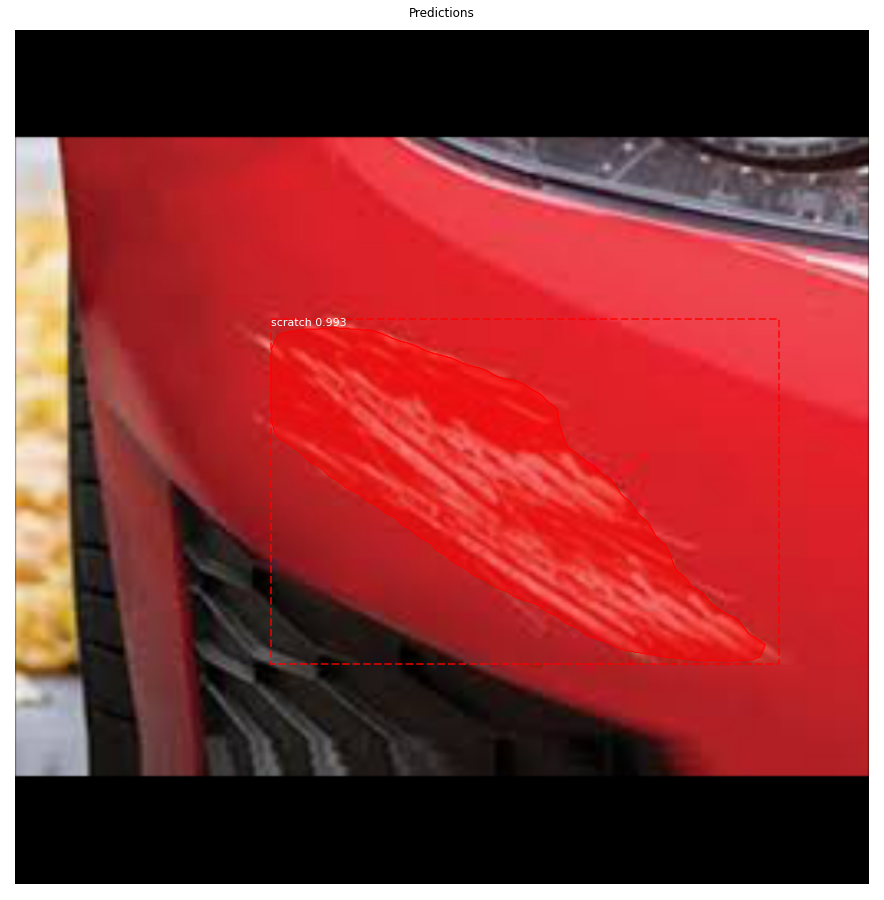

In [36]:
image_id = random.choice(dataset.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))

# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)
print('The car has:{} damages'.format(len(dataset.image_info[image_id]['polygons'])))